In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [5]:
from glob import glob

import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from SSMuLA.landscape_global import hamming, LIB_INFO_DICT
from SSMuLA.vis import LIB_COLORS

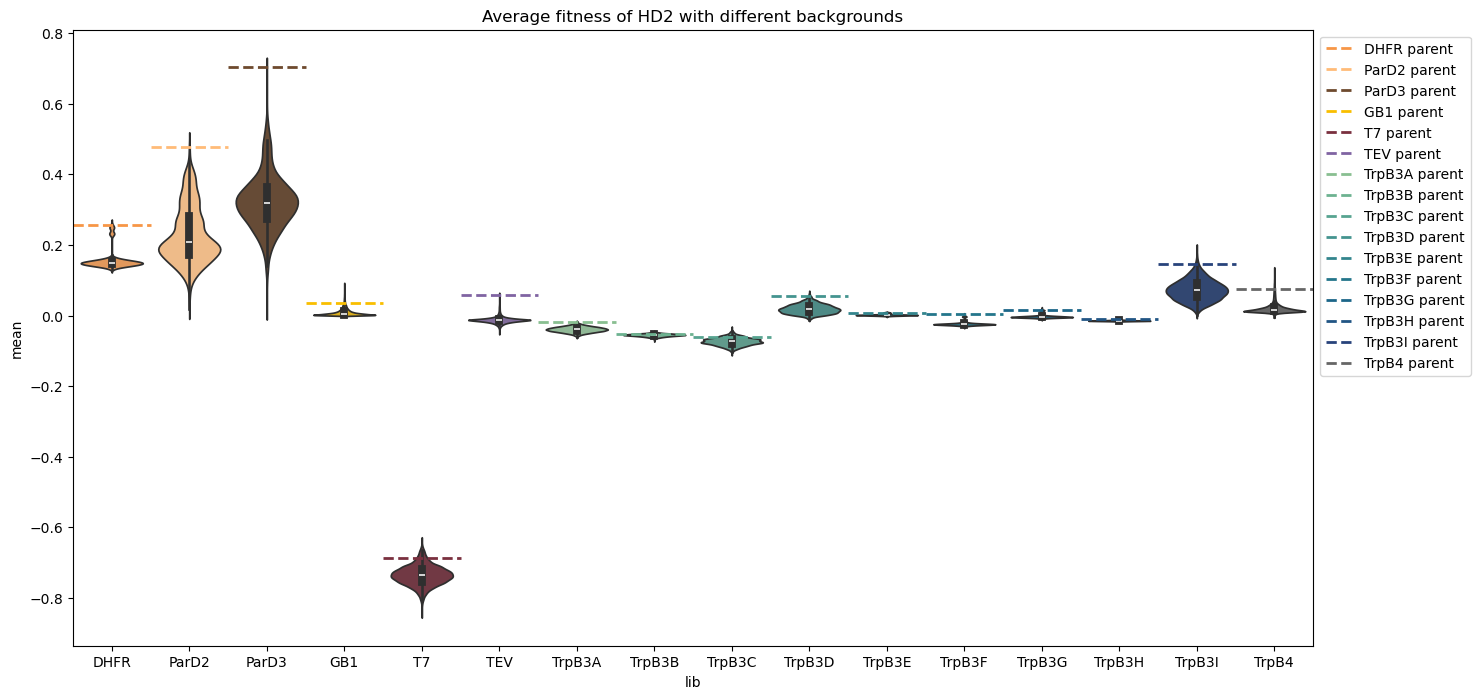

In [6]:
all_dfs = []
wt_mean = {}

for lib, lib_dict in LIB_INFO_DICT.items():
    
    df = pd.read_csv(f"results/hd/{lib}.csv")
    df["lib"] = lib
    all_dfs.append(df)

    wt_mean[lib] = df[df["AAs"] == "".join(lib_dict["AAs"].values())]["mean"].values[0]

all_df = pd.concat(all_dfs)

plt.figure(figsize=(16, 8))  # Adjust the size as needed
ax = sns.violinplot(x="lib", y="mean", data=all_df, hue="lib", palette=LIB_COLORS)

for lib in LIB_INFO_DICT.keys():

    # Find the position of the violin to add the line to
    position = all_df["lib"].unique().tolist().index(lib)
    ax.axhline(
        wt_mean[lib],
        color=LIB_COLORS[lib],
        linestyle="--",
        linewidth=2,
        xmin=position / len(LIB_INFO_DICT),
        xmax=(position + 1) / len(LIB_INFO_DICT),
        label=f"{lib} parent",
    )

ax.set_title("Average fitness of HD2 with different backgrounds")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
# Optional: Set x-axis labels to rotate for better visibility
# plt.xticks(rotation=45)